붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel과 슬랙 변수 가중치 인수 C는 각각 linear, 1e10으로 한다.

특징 변수를 꽃받침의 길이와 폭만 사용한다.
붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_iris

In [94]:
iris = load_iris()
X,y = iris.data,iris.target
X = X[:100,0:2]
y = y[:100]

In [76]:
X.shape , len(y)

((100, 2), 100)

In [90]:
for i in range(len(y)):
    if y[i]==0:
        y[i] = -1

In [91]:
type(y)

numpy.ndarray

In [80]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

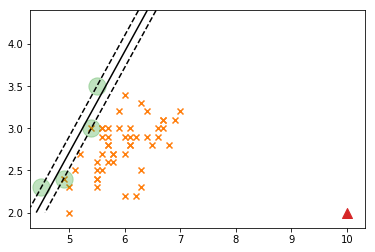

In [95]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()

In [82]:
model.n_support_
# 각 클래스의 서포트의 갯수

array([2, 2], dtype=int32)

In [83]:
model.support_
# 각 클래스의 서포트의 인덱스

array([36, 41, 57, 84], dtype=int32)

In [84]:
model.support_vectors_
# 각 클래스의 서포트 x의 값

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

In [85]:
y[model.support_]
# 서포트가 위치한 클래스 

array([-1, -1,  1,  1])

In [124]:
iris = load_iris()
X,y = iris.data,iris.target
X = X[50:,2:]
y = y[50:]

In [127]:
X.shape,y.shape

((100, 2), (100,))

In [125]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [131]:
from sklearn.svm import SVC
kfold = KFold(5)
for i in np.arange(0.1,10000,100):
    model = SVC(kernel='linear', C=i).fit(X,y)
    print(np.mean(cross_val_score(model,X,y,cv=kfold)))

0.85
0.9099999999999999
0.9099999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.9199999999999999
0.91999

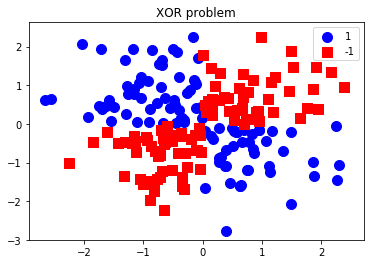

In [138]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

In [141]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

In [135]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

X = np.arange(8).reshape(4, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [136]:
FunctionTransformer(basis).fit_transform(X)


array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

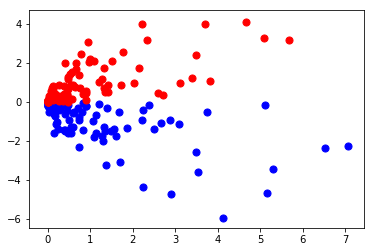

In [139]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor== 1, 0], X_xor2[y_xor== 1, 1], c="b", s=50)
plt.scatter(X_xor2[y_xor==-1, 0], X_xor2[y_xor==-1, 1], c="r", s=50)
plt.show()

pi function 상의 직선을 그어주면 아래의 곡선이 나온다.

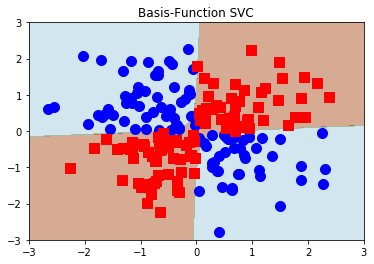

In [143]:
from sklearn.pipeline import Pipeline
import matplotlib as mpl

basismodel = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Basis-Function SVC")

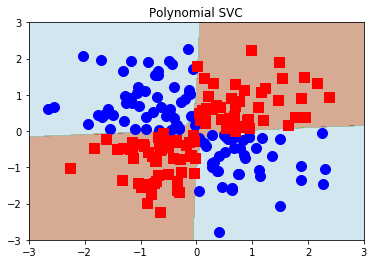

In [144]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Polynomial SVC")

사실 Radial Basis Function만 쓴다.

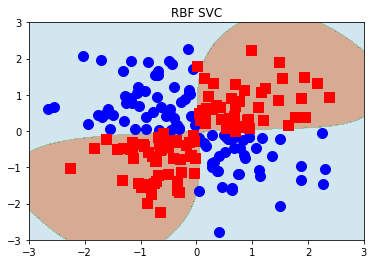

In [145]:
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, "RBF SVC")

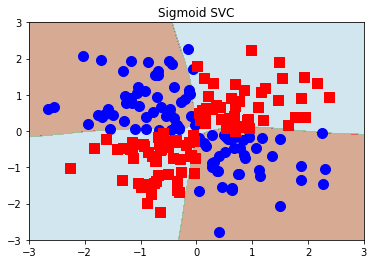

In [146]:
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, sigmoidsvc, "Sigmoid SVC")

적절한 감마값을 찾아야 한다. test performance기반으로 찾는다.

In [147]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y==2, 0], X[y==2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

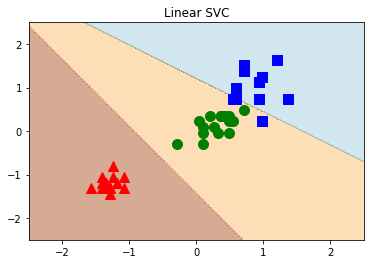

In [148]:
model = SVC(kernel='linear').fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Linear SVC")

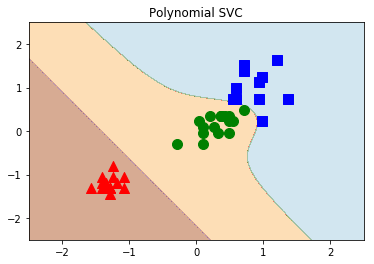

In [149]:
model = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Polynomial SVC")

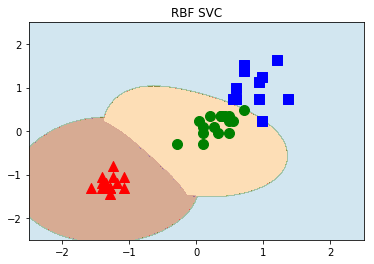

In [152]:
model = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "RBF SVC")